## Imports

In [1]:
import matplotlib.pyplot as plt
from numba import jit
import numpy as np
import random, math, pylab

## Funções

In [2]:
@jit(nopython=True)
def estado_inicial(N):
    dist = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            dist[i][j] = np.sign(2*np.random.random()-1)
    return s

@jit(nopython=True)
def dist_cidades(cord1, cord2):
    return math.sqrt((cord1[0] - cord2[0])**2 + (cord1[1] - cord2[1])**2)

@jit(nopython=True)
def dist_tabela(cities_cord, N):
    dist = np.zeros((N,N))

    for i in range(0, N):
        for j in range(0, N):
            dist[i][j] = dist_cidades(cities_cord[i], cities_cord[j])

    return dist


@jit(nopython=True)
def custo_ener(dist, cam):
    ener = 0
    for i in range(N-1):
        ener += dist[cam[i],cam[i+1]]
    ener += dist[cam[0],cam[N-1]]
    return ener

@jit(nopython=True)
def gerar_novo_caminho(N, cam, dist):
    ncam = np.zeros(N,dtype=np.int16)
    i = np.random.randint(N)
    j = i

    while j==i: # escolhe j de forma que 𝑗 ≠ 𝑖
        j=np.random.randint(N)

    if i>j:
        ini = j
        fim = i
    else:
        ini = i
        fim = j

    for k in range(N):
        if k >= ini and k <= fim:
            ncam[k] = cam[fim-k+ini]
        else:
            ncam[k] = cam[k]

    esq = ini - 1
    if esq < 0 : esq = N-1
    dir = fim+1
    if dir > N - 1: dir = 0
    de = -dist[cam[esq], cam[ini]] - dist[cam[dir], cam[fim]] + dist[ncam[esq], ncam[ini]] + dist[ncam[dir], ncam[fim]]

    return ncam, de

# Simulações

## Para n = 10

In [3]:
# N = random.randint(10, 60)
N = 10

Ti = random.uniform(1, 10)
Tf = random.uniform(0.005, 0.0001)
dt = random.uniform(0.8, 0.99)

x = np.random.rand(N)
y = np.random.rand(N)

cities_cord = []
for i in range(0, N):
    cities_cord.append((x[i], y[i]))

dist = dist_tabela(cities_cord, N)

cam = np.linspace(0,N-1,N).astype(np.int)
cam_plot = np.linspace(0,N-1,N).astype(np.int)


print("Configuração inicial")
print("N = ", N)
print("Ti = ", Ti)
print("Tf = ", Tf)
print("dt = ", dt)
print("Cordenadas das cidades = ", cities_cord)
print("Caminho inicial: ", cam)

custo_total = []
x_plot = []
f = 0

custo = custo_ener(dist, cam)
print("Custo inicial: ", custo)
j=0
first_one = True

while Ti>Tf:
    for i in range(0, 100):
        custo = custo_ener(dist, cam)

        if first_one and i==99:
            cam_anterior = cam

        custo_total.append(custo)
        x_plot.append(f)
        f += 1

        ncam, de = gerar_novo_caminho(N, cam, dist)
        if de<0:
            cam = ncam
        else:
            rand_number = random.uniform(0, 1)
            exp_number = math.exp(-de/Ti)
            if rand_number < exp_number:
                cam = ncam

    first_one = False

    Ti *= dt


print("Custo final: ",custo)
print("Caminho final: ", cam)

/usr/local/lib/python3.7/dist-packages/numba/core/ir_utils.py:2031: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'cities_cord' of function 'dist_tabela'.

For more information visit https://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "<ipython-input-2-9669aad36282>", line 14:
@jit(nopython=True)
def dist_tabela(cities_cord, N):
^

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))


Configuração inicial
N =  10
Ti =  1.6059307315584126
Tf =  0.004842867072190038
dt =  0.9131344080372176
Cordenadas das cidades =  [(0.7904021658532749, 0.9715315644218604), (0.96608787478927, 0.3515651898603097), (0.37202384257154375, 0.7519368284611712), (0.20995466439770194, 0.7038634831431404), (0.045312583020473474, 0.9870492389844667), (0.7830712042162312, 0.123898489617144), (0.20685193740633856, 0.33439941184697963), (0.4014172381137602, 0.1936728927981105), (0.3352969759244985, 0.8277882112203555), (0.5722974326967353, 0.4896460400623802)]
Caminho inicial:  [0 1 2 3 4 5 6 7 8 9]
Custo inicial:  5.425878921344689
Custo final:  3.451122148425296
Caminho final:  [6 7 5 1 9 0 2 8 4 3]


## Gráficos

### Energia

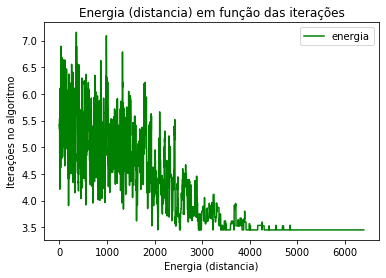

In [4]:
plt.plot(x_plot, custo_total, label = 'energia', color='green')
plt.title('Energia (distancia) em função das iterações')
plt.xlabel('Energia (distancia)')
plt.ylabel('Iterações no algoritmo')
plt.legend()
plt.show()

### Caminho anterior ao ótimo

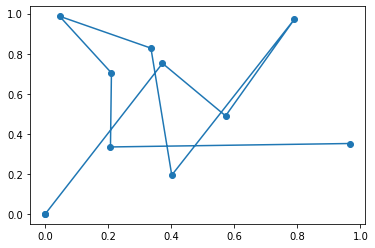

In [5]:
newx = np.zeros(N+1, dtype=np.float32)
newy = np.zeros(N+1, dtype=np.float32)

for k in range(N-1):
    newx[k]=x[cam_anterior[k]]
    newy[k]=y[cam_anterior[k]]
# para interligar os pontos inicio e fim
# newx[N]=x[cam_anterior[0]]
# newy[N]=y[cam_anterior[0]]

plt.plot(newx, newy, '-o')
plt.ion()

### Caminho ótimo encontrado

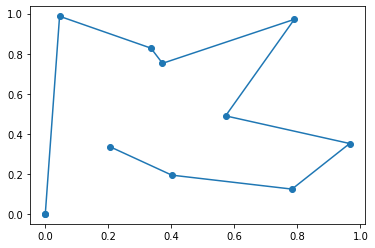

In [6]:
newx = np.zeros(N+1, dtype=np.float32)
newy = np.zeros(N+1, dtype=np.float32)

for k in range(N-1):
    newx[k]=x[cam[k]]
    newy[k]=y[cam[k]]
# para interligar os pontos inicio e fim
# newx[N]=x[cam[0]]
# newy[N]=y[cam[0]]

plt.plot(newx, newy, '-o')
plt.ion()

## Para N aleatórios

In [7]:
N = random.randint(10, 60)

Ti = random.uniform(1, 10)
Tf = random.uniform(0.005, 0.0001)
dt = random.uniform(0.8, 0.99)

x = np.random.rand(N)
y = np.random.rand(N)

cities_cord = []
for i in range(0, N):
    cities_cord.append((x[i], y[i]))

dist = dist_tabela(cities_cord, N)

cam = np.linspace(0,N-1,N).astype(np.int)
cam_plot = np.linspace(0,N-1,N).astype(np.int)


print("Configuração inicial")
print("N = ", N)
print("Ti = ", Ti)
print("Tf = ", Tf)
print("dt = ", dt)
print("Cordenadas das cidades = ", cities_cord)
print("Caminho inicial: ", cam)

custo_total = []
x_plot = []
f = 0

custo = custo_ener(dist, cam)
print("Custo inicial: ", custo)
j=0
first_one = True

while Ti>Tf:
    for i in range(0, 100):
        custo = custo_ener(dist, cam)

        if first_one and i==99:
            cam_anterior = cam

        custo_total.append(custo)
        x_plot.append(f)
        f += 1

        ncam, de = gerar_novo_caminho(N, cam, dist)
        if de<0:
            cam = ncam
        else:
            rand_number = random.uniform(0, 1)
            exp_number = math.exp(-de/Ti)
            if rand_number < exp_number:
                cam = ncam

    first_one = False

    Ti *= dt


print("Custo final: ",custo)
print("Caminho final: ", cam)

Configuração inicial
N =  60
Ti =  5.860017443929798
Tf =  0.0025026485798032346
dt =  0.9152102999868812
Cordenadas das cidades =  [(0.18840515030513894, 0.43855448313349477), (0.13447933825604985, 0.28148443664594336), (0.8900049077597965, 0.28772716564359413), (0.14394252671409025, 0.02177099702193741), (0.9165632856381597, 0.40143338756509916), (0.23974820727629098, 0.635720274794864), (0.23125562271451972, 0.494255326674097), (0.7544231781449418, 0.5748682455608762), (0.6331407075529317, 0.7735592741403124), (0.9086321527115664, 0.7831134464773426), (0.3309237622504655, 0.8580076875699355), (0.7859792595806709, 0.6321238431519134), (0.9484842162812909, 0.8950003150308654), (0.9821571667154447, 0.5124278682317897), (0.9675340092563849, 0.009618381811760779), (0.8357751708912079, 0.20344111693912248), (0.8978445268295557, 0.7072971283051379), (0.07781583764049715, 0.0012058788579707436), (0.6996538370534746, 0.4939217495931233), (0.8615209704139893, 0.0379568279817899), (0.815614984

### Energia

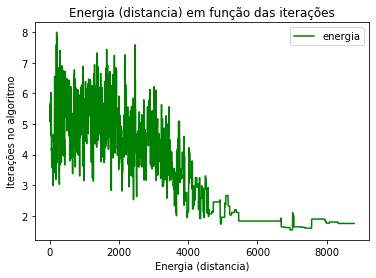

In [8]:
plt.plot(x_plot, custo_total, label = 'energia', color='green')
plt.title('Energia (distancia) em função das iterações')
plt.xlabel('Energia (distancia)')
plt.ylabel('Iterações no algoritmo')
plt.legend()
plt.show()

### Caminho anterior ao ótimo

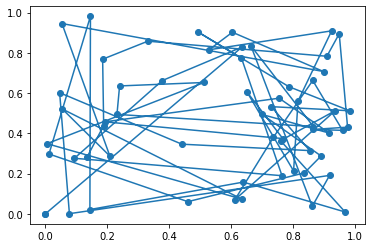

In [9]:
newx = np.zeros(N+1, dtype=np.float32)
newy = np.zeros(N+1, dtype=np.float32)

for k in range(N-1):
    newx[k]=x[cam_anterior[k]]
    newy[k]=y[cam_anterior[k]]
# para interligar os pontos inicio e fim
# newx[N]=x[cam_anterior[0]]
# newy[N]=y[cam_anterior[0]]

plt.plot(newx, newy, '-o')
plt.ion()

### Caminho ótimo encontrado

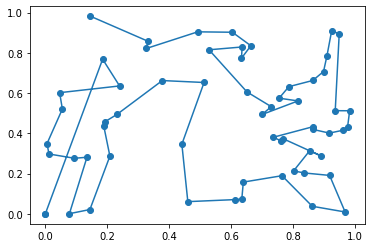

In [10]:
newx = np.zeros(N+1, dtype=np.float32)
newy = np.zeros(N+1, dtype=np.float32)

for k in range(N-1):
    newx[k]=x[cam[k]]
    newy[k]=y[cam[k]]
# para interligar os pontos inicio e fim
# newx[N]=x[cam[0]]
# newy[N]=y[cam[0]]

plt.plot(newx, newy, '-o')
plt.ion()

## Alterando apenas se o caminho for considerado 'melhor'

In [19]:
N = 50

Ti = 9
Tf = 0.0001
dt = 0.99

x = np.random.rand(N)
y = np.random.rand(N)

cities_cord = []
for i in range(0, N):
    cities_cord.append((x[i], y[i]))

dist = dist_tabela(cities_cord, N)

cam = np.linspace(0,N-1,N).astype(np.int)
cam_plot = np.linspace(0,N-1,N).astype(np.int)


print("Configuração inicial")
print("N = ", N)
print("Ti = ", Ti)
print("Tf = ", Tf)
print("dt = ", dt)
print("Cordenadas das cidades = ", cities_cord)
print("Caminho inicial: ", cam)

custo_total = []
x_plot = []
f = 0

custo = custo_ener(dist, cam)
print("Custo inicial: ", custo)
j=0
first_one = True

while Ti>Tf:
    for i in range(0, 100):
        custo = custo_ener(dist, cam)

        if first_one and i==99:
            cam_anterior = cam

        custo_total.append(custo)
        x_plot.append(f)
        f += 1

        ncam, de = gerar_novo_caminho(N, cam, dist)
        if de<0:
            cam = ncam
        # else:
        #     rand_number = random.uniform(0, 1)
        #     exp_number = math.exp(-de/Ti)
        #     if rand_number < exp_number:
        #         cam = ncam

    first_one = False

    Ti *= dt


print("Custo final: ",custo)
print("Caminho final: ", cam)

Configuração inicial
N =  50
Ti =  9
Tf =  0.0001
dt =  0.99
Cordenadas das cidades =  [(0.5688813916308606, 0.782626969263094), (0.7837871181392074, 0.35083914898907675), (0.05568817610140098, 0.8147307655310269), (0.6678139779646506, 0.4536255927670326), (0.19604258486083082, 0.02868545679720136), (0.5154023362178811, 0.2327402498123402), (0.5975132005386121, 0.6707285308889249), (0.019460046189985425, 0.17136627265052462), (0.17973521250652746, 0.8680104014345811), (0.8183782428891107, 0.4249134236414227), (0.5847121799978738, 0.9398447382587378), (0.1103067336205632, 0.36429535873929764), (0.04137492414906874, 0.0913755158345203), (0.588872988255558, 0.39612322180220283), (0.9123795756938604, 0.602891741025051), (0.4233905410061225, 0.8109209077117847), (0.6129512054803578, 0.20517514459419506), (0.39626713723327767, 0.4553255003179044), (0.4328829249319389, 0.5269214671109956), (0.7726935619509742, 0.2511221539905164), (0.4799631294496566, 0.9831671120894231), (0.6761540217825561,

### Energia/distancia

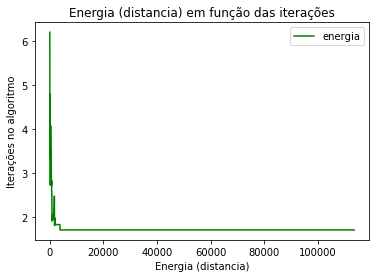

In [20]:
plt.plot(x_plot, custo_total, label = 'energia', color='green')
plt.title('Energia (distancia) em função das iterações')
plt.xlabel('Energia (distancia)')
plt.ylabel('Iterações no algoritmo')
plt.legend()
plt.show()

### Caminho anterior ao ótimo

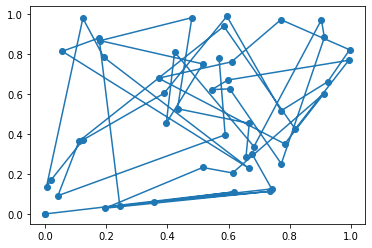

In [21]:
newx = np.zeros(N+1, dtype=np.float32)
newy = np.zeros(N+1, dtype=np.float32)

for k in range(N-1):
    newx[k]=x[cam_anterior[k]]
    newy[k]=y[cam_anterior[k]]
# para interligar os pontos inicio e fim
# newx[N]=x[cam_anterior[0]]
# newy[N]=y[cam_anterior[0]]

plt.plot(newx, newy, '-o')
plt.ion()

### Caminho ótimo encontrado

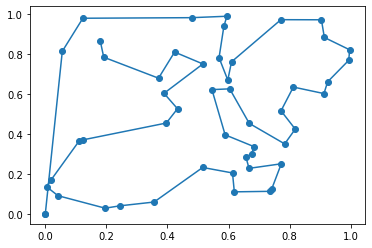

In [23]:
newx = np.zeros(N+1, dtype=np.float32)
newy = np.zeros(N+1, dtype=np.float32)

for k in range(N-1):
    newx[k]=x[cam[k]]
    newy[k]=y[cam[k]]
# para interligar os pontos inicio e fim
# newx[N]=x[cam[0]]
# newy[N]=y[cam[0]]

plt.plot(newx, newy, '-o')
plt.ion()

## Comparando com o teste anterior, com a aleatoriedade

In [24]:
N = 50

Ti = 9
Tf = 0.0001
dt = 0.99

# x = np.random.rand(N)
# y = np.random.rand(N)

cities_cord = []
for i in range(0, N):
    cities_cord.append((x[i], y[i]))

dist = dist_tabela(cities_cord, N)

cam = np.linspace(0,N-1,N).astype(np.int)
cam_plot = np.linspace(0,N-1,N).astype(np.int)


print("Configuração inicial")
print("N = ", N)
print("Ti = ", Ti)
print("Tf = ", Tf)
print("dt = ", dt)
print("Cordenadas das cidades = ", cities_cord)
print("Caminho inicial: ", cam)

custo_total = []
x_plot = []
f = 0

custo = custo_ener(dist, cam)
print("Custo inicial: ", custo)
j=0
first_one = True

while Ti>Tf:
    for i in range(0, 100):
        custo = custo_ener(dist, cam)

        if first_one and i==99:
            cam_anterior = cam

        custo_total.append(custo)
        x_plot.append(f)
        f += 1

        ncam, de = gerar_novo_caminho(N, cam, dist)
        if de<0:
            cam = ncam
        else:
            rand_number = random.uniform(0, 1)
            exp_number = math.exp(-de/Ti)
            if rand_number < exp_number:
                cam = ncam

    first_one = False

    Ti *= dt


print("Custo final: ",custo)
print("Caminho final: ", cam)

Configuração inicial
N =  50
Ti =  9
Tf =  0.0001
dt =  0.99
Cordenadas das cidades =  [(0.5688813916308606, 0.782626969263094), (0.7837871181392074, 0.35083914898907675), (0.05568817610140098, 0.8147307655310269), (0.6678139779646506, 0.4536255927670326), (0.19604258486083082, 0.02868545679720136), (0.5154023362178811, 0.2327402498123402), (0.5975132005386121, 0.6707285308889249), (0.019460046189985425, 0.17136627265052462), (0.17973521250652746, 0.8680104014345811), (0.8183782428891107, 0.4249134236414227), (0.5847121799978738, 0.9398447382587378), (0.1103067336205632, 0.36429535873929764), (0.04137492414906874, 0.0913755158345203), (0.588872988255558, 0.39612322180220283), (0.9123795756938604, 0.602891741025051), (0.4233905410061225, 0.8109209077117847), (0.6129512054803578, 0.20517514459419506), (0.39626713723327767, 0.4553255003179044), (0.4328829249319389, 0.5269214671109956), (0.7726935619509742, 0.2511221539905164), (0.4799631294496566, 0.9831671120894231), (0.6761540217825561,

### Energia/distancia

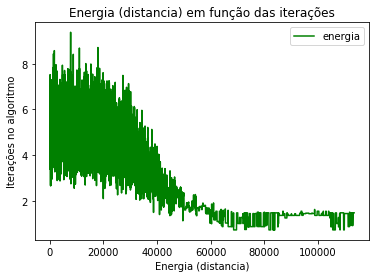

In [25]:
plt.plot(x_plot, custo_total, label = 'energia', color='green')
plt.title('Energia (distancia) em função das iterações')
plt.xlabel('Energia (distancia)')
plt.ylabel('Iterações no algoritmo')
plt.legend()
plt.show()

### Caminho anterior ao ótimo

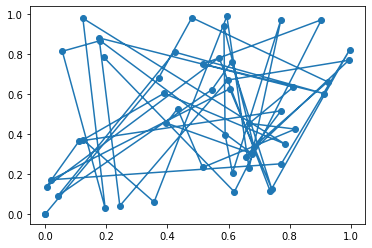

In [26]:
newx = np.zeros(N+1, dtype=np.float32)
newy = np.zeros(N+1, dtype=np.float32)

for k in range(N-1):
    newx[k]=x[cam_anterior[k]]
    newy[k]=y[cam_anterior[k]]
# para interligar os pontos inicio e fim
# newx[N]=x[cam_anterior[0]]
# newy[N]=y[cam_anterior[0]]

plt.plot(newx, newy, '-o')
plt.ion()

### Caminho ótimo encontrado

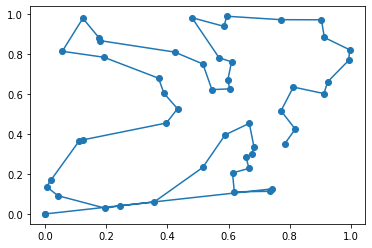

In [27]:
newx = np.zeros(N+1, dtype=np.float32)
newy = np.zeros(N+1, dtype=np.float32)

for k in range(N-1):
    newx[k]=x[cam[k]]
    newy[k]=y[cam[k]]
# para interligar os pontos inicio e fim
# newx[N]=x[cam[0]]
# newy[N]=y[cam[0]]

plt.plot(newx, newy, '-o')
plt.ion()

## Relatório

O método se mostra muito eficiente na maioria dos casos. Isso é perceptível comparando os gráficos finais, analizando a distância(energia) gasta no sistema.

De modo geral, a presença da aleatoriedade é forte para temperaturas inicias mais altas e finais pequenas, de modo que, ao acompanhar o gráfico de distancias totais, nem sempre o caminho final é o que se mostra melhor, isto é, o que percorre menores distancias. Além disso, não apenas nos passos finais do algortimo, a mudança buscando sempre o melhor resultado é bem visivel nos gráficos de distancia quando x está próximo de 0, evidenciado devido às variações bruscas em seu eixo y.

Por fim, realizei um teste para visualizar a diferença do algoritmo caso o novo caminho fosse aceito apenas caso se provasse melhor e, como foi possível ver os gráficos e distancias(energia) finais, quando a aleatoriedade esteve presente o resultado encontrado foi superior ao caso em que não, mostrando a importância dela para que caminhos melhores fossem encontrados. 